In [ ]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.7 MB/s eta 0:00:00


Output saved to /content/output_headshotskt.jpg


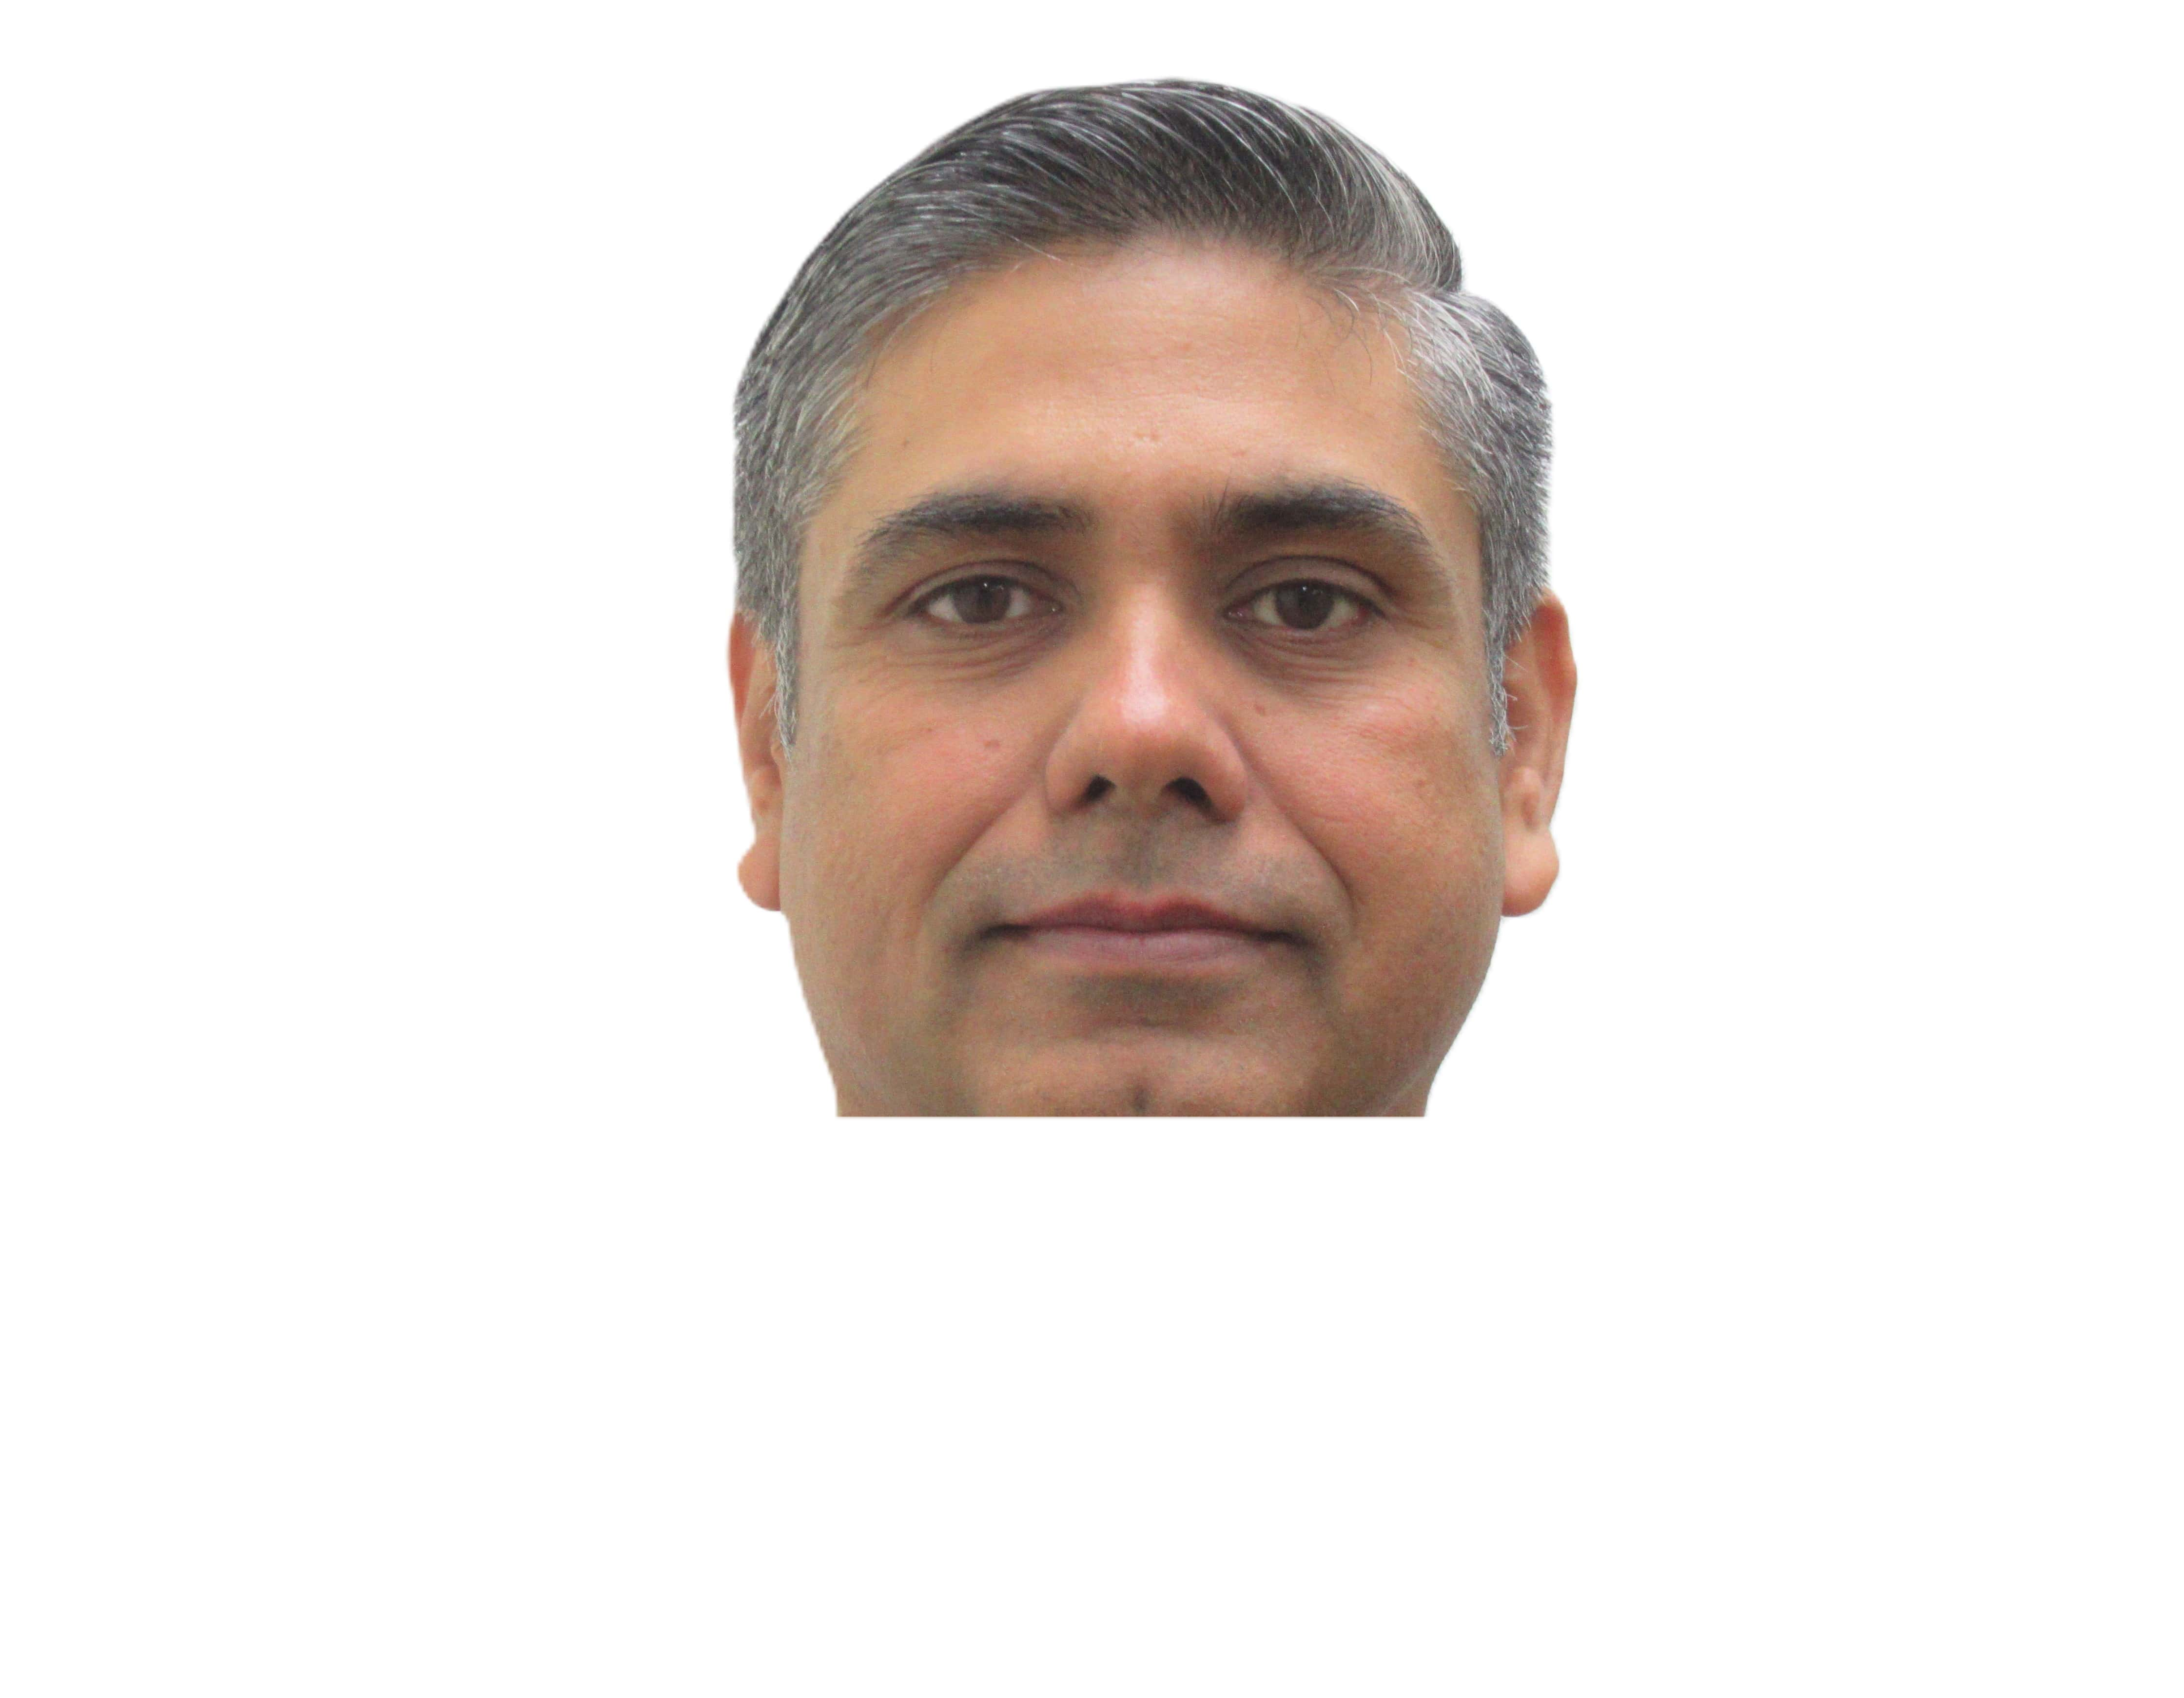

In [ ]:
import cv2
import numpy as np
from mtcnn import MTCNN
from google.colab.patches import cv2_imshow  # For displaying images in Colab

def isolate_headshot(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not load image.")
        return

    # Convert image to RGB for MTCNN (OpenCV loads in BGR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize MTCNN face detector
    detector = MTCNN()

    # Detect faces in the image
    faces = detector.detect_faces(image_rgb)
    if len(faces) == 0:
        print("Error: No faces detected.")
        return

    # Use the first detected face
    face = faces[0]
    x, y, w, h = face['box']  # Bounding box: [x, y, width, height]
    keypoints = face['keypoints']  # Facial landmarks

    # Calculate region to include face and hair
    # Use facial landmarks to estimate hair region
    eye_level = (keypoints['left_eye'][1] + keypoints['right_eye'][1]) // 2
    mouth_level = keypoints['mouth_left'][1]  # Approximate mouth y-coordinate

    # Expand upward for hair, downward to mouth, and slightly wider for face
    expand_factor = 0.1 // 0.4   Controls width expansion
    hair_factor = 0.4 // 0.6     Controls how much hair to include above eyes
    x_new = max(x - int(w * expand_factor / 2), 0)
    w_new = min(int(w * (1 + expand_factor)), image.shape[1])
    y_new = max(eye_level - int(h * hair_factor), 0)  # Start above eyes for hair
    h_new = min(mouth_level - y_new + int(h * 0.2), image.shape[0])  # Extend to mouth + small buffer

    # Create a white background mask
    mask = np.zeros_like(image)
    mask[:] = (255, 255, 255)  # Set to white (BGR)

    # Copy only the face and hair region to the mask
    mask[y_new:y_new + h_new, x_new:x_new + w_new] = image[y_new:y_new + h_new, x_new:x_new + w_new]

    # Apply a soft mask to blend edges (feathering effect)
    # Create a binary mask for the selected region
    binary_mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    binary_mask[y_new:y_new + h_new, x_new:x_new + w_new] = 255
    # Apply Gaussian blur to soften edges
    binary_mask = cv2.GaussianBlur(binary_mask, (21, 21), 0) //reduce it from 21,21 to 15 , 15
    binary_mask = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR) / 255.0

    # Blend the original image with the white background using the soft mask
    result = image * binary_mask + mask * (1 - binary_mask)
    result = result.astype(np.uint8)

    # Save the output image
    cv2.imwrite(output_path, result)
    print(f"Output saved to {output_path}")

    # Display the result in Colab
    cv2_imshow(result)

# Example usage
# Upload your image to Colab first, then specify the path
image_path = '/content/SumatJP-min.jpg'  # Replace with your image path
output_path = '/content/output_headshotskt.jpg'  # Replace with desired output path
isolate_headshot(image_path, output_path)

Output saved to /content/output_headshotIraMTCNN.jpg


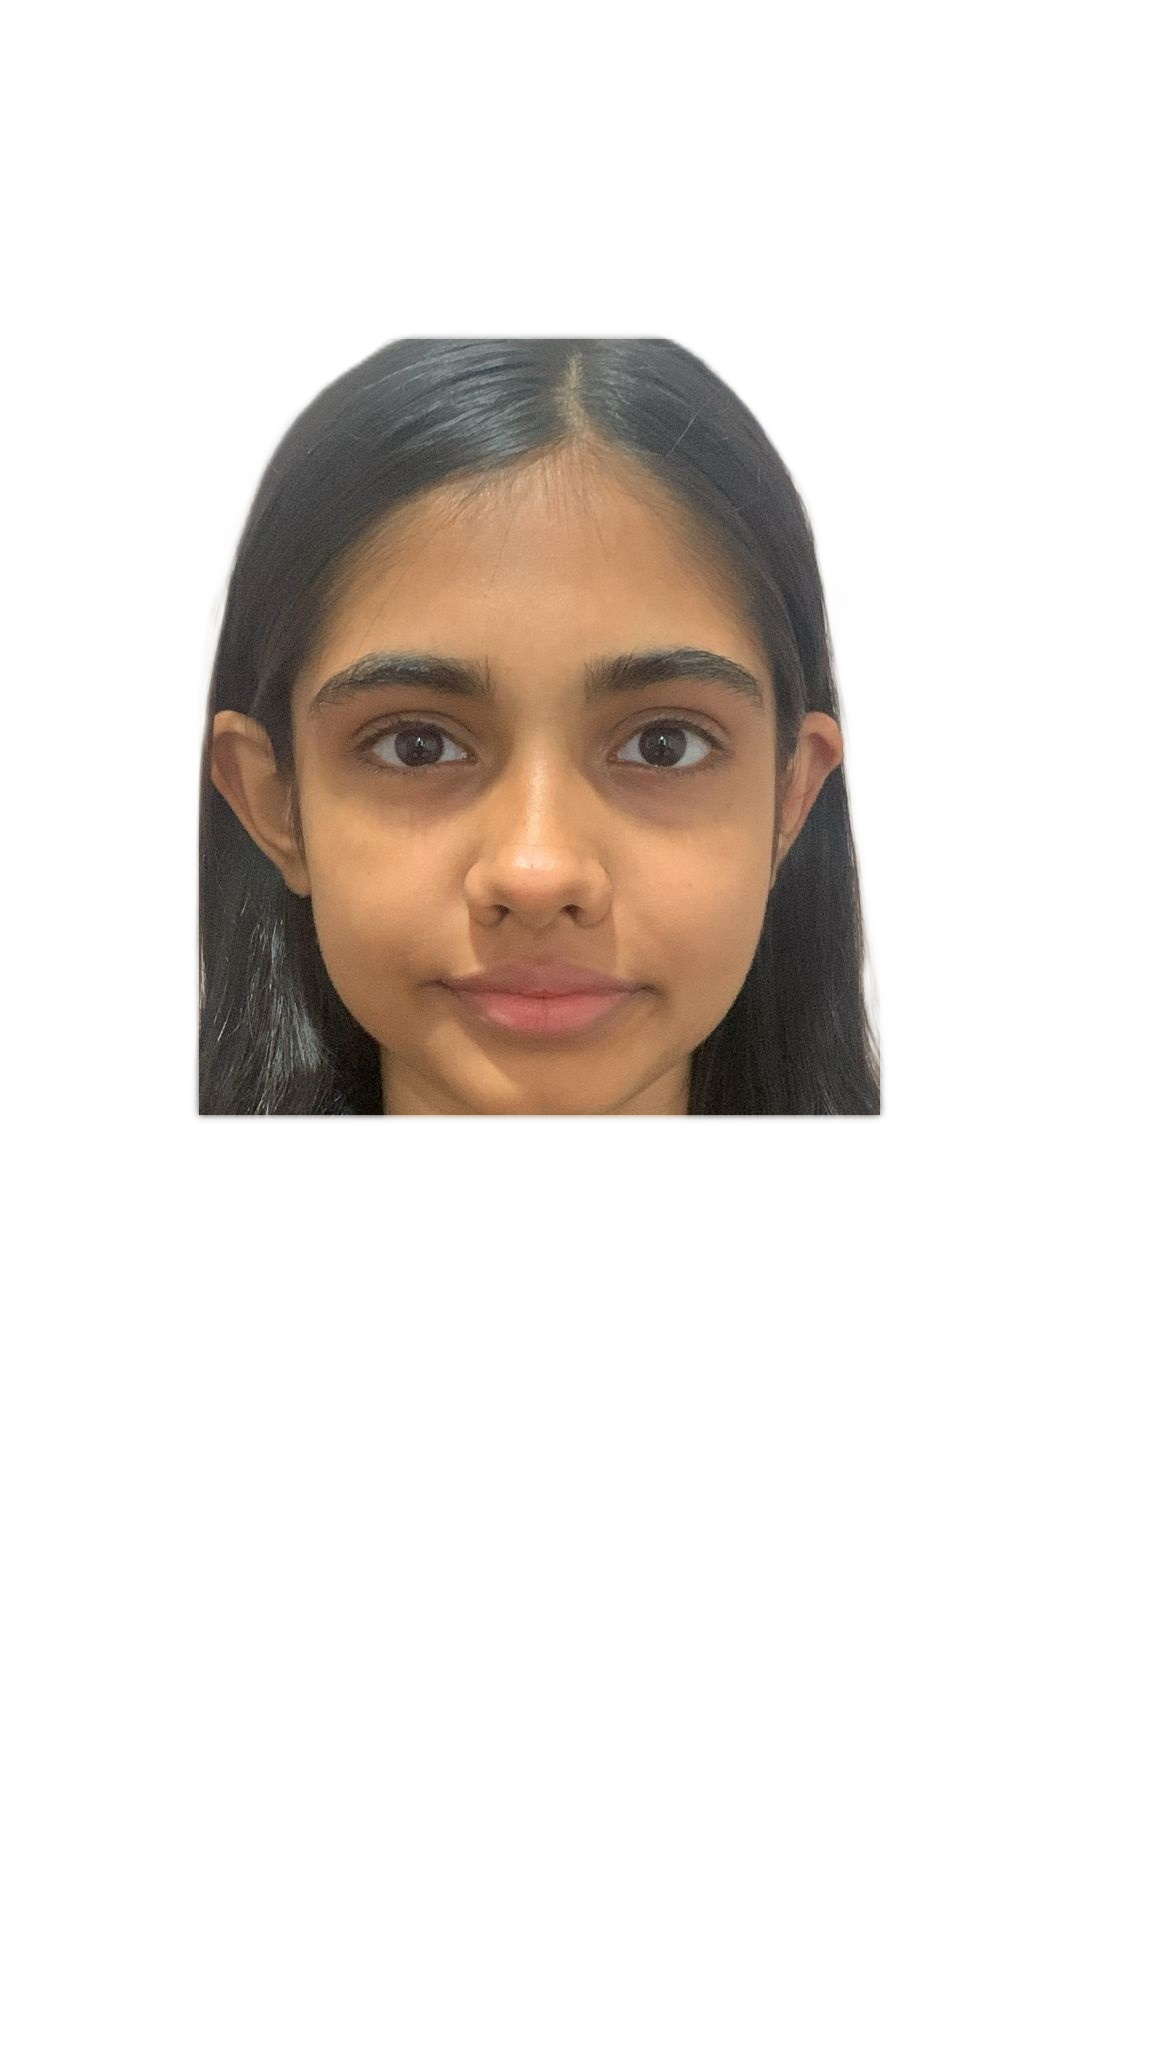

In [ ]:
# Example usage
# Upload your image to Colab first, then specify the path
image_path = '/content/output_headshotIra.jpg'  # Replace with your image path
output_path = '/content/output_headshotIraMTCNN.jpg'  # Replace with desired output path
isolate_headshot(image_path, output_path)

Output saved to /content/output_headshotManiMTCNN.jpg


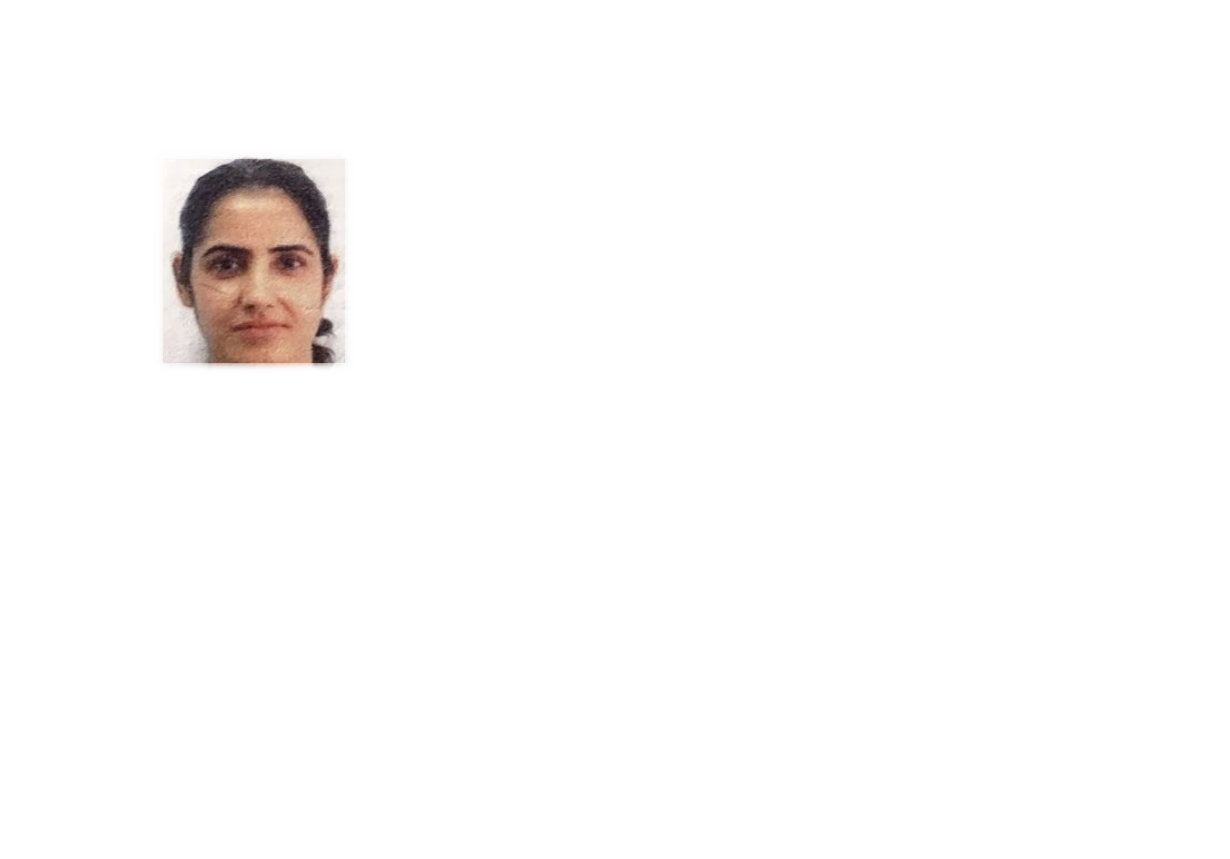

In [ ]:
# Example usage
# Upload your image to Colab first, then specify the path
image_path = '/content/ManiPP.png'  # Replace with your image path
output_path = '/content/output_headshotManiMTCNN.jpg'  # Replace with desired output path
isolate_headshot(image_path, output_path)

Output saved to /content/output_headshotSundar1MTCNN.jpg


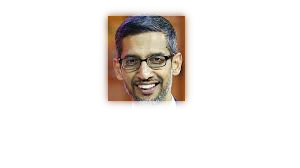

In [ ]:
# Example usage
# Upload your image to Colab first, then specify the path
image_path = '/content/Sundar1.jpg'  # Replace with your image path
output_path = '/content/output_headshotSundar1MTCNN.jpg'  # Replace with desired output path
isolate_headshot(image_path, output_path)

In [ ]:
import cv2
import numpy as np

# Load the image from file
image_path = '/content/Sundar1.jpg'
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# Convert the image to grayscale for better face detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load OpenCV's pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Check if any faces are detected
if len(faces) == 0:
    raise ValueError("No face detected!")

# Process each detected face
for (x, y, w, h) in faces:
    # Adjust height for including hair, the factor can be tuned
    h_adjustment_factor = 0.3
    adjusted_height = int(h + h * h_adjustment_factor)

    # Ensure the square aspect ratio by adjusting width or height
    if w < adjusted_height:
        adjusted_height = w
    elif w > adjusted_height:
        adjusted_x = x + (w - adjusted_height) // 2
        x = adjusted_x
        w = adjusted_height

    # Extract the adjusted face region
    face_region = image[y:y+adjusted_height, x:x+w]

    # Create a white background with the same size
    blank_background = np.full((adjusted_height, w, 3), 255, dtype=np.uint8)

    # Place the face region on the white background
    blank_background[0:adjusted_height, 0:w] = face_region

# Save the new image with the extracted face on a white background
output_path = 'output_image.jpg'
cv2.imwrite(output_path, blank_background)

print(f"Image saved as {output_path}")

Image saved as output_image.jpg


In [ ]:
import cv2
import dlib
import numpy as np

# Load the image
image_path = '/content/Sundar1.jpg'
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# Load dlib's face detector and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')

# Detect faces in the image
faces = detector(image)

if len(faces) == 0:
    raise ValueError("No face detected!")

# Create a white background
blank_background = np.full_like(image, 255)

# Process each detected face
for face in faces:
    # Get the landmarks/parts for the face
    shape = predictor(image, face)

    # Convert landmarks to a NumPy array
    landmarks = np.array([(shape.part(i).x, shape.part(i).y) for i in range(68)])

    # Define the face contour using specific landmark indices (approximate face contour)
    face_contour_indices = list(range(0, 67))  # Indices typically defining the jawline

    # Create a mask for the face contour
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [landmarks[face_contour_indices]], (255))

    # Use the mask to extract the face contour, overlay on the white background
    face_contour = cv2.bitwise_and(image, image, mask=mask)
    blank_background = cv2.bitwise_or(blank_background, face_contour)

# Save the new image with the extracted face contour on a white background
output_path = 'output_image1.jpg'
cv2.imwrite(output_path, blank_background)

print(f"Image saved as {output_path}")

Image saved as output_image1.jpg


In [ ]:

!pip install dlib opencv-python numpy

import cv2
import dlib
import numpy as np

# Load the image
image_path = '/content/Sundar2.jpg' #Change this to your image path
image = cv2.imread(image_path)

if image is None:
  raise FileNotFoundError(f"Image not found at {image_path}")

# Load dlib's face detector and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Detect faces in the image
faces = detector(image)

if len(faces) == 0:
   raise ValueError("No face detected!")

# Create a transparent background
#transparent_background = np.zeros((image.shape[0], image.shape[1], 4), dtype=np.uint8)

# Create a white background
white_background = np.full_like(image, 255)


# Process each detected face
for face in faces:
 shape = predictor(image, face)
 landmarks = np.array([(shape.part(i).x, shape.part(i).y) for i in range(68)])

 # Create a convex hull around all landmarks
 hull = cv2.convexHull(landmarks)

 # Create a mask for the face region
 mask = np.zeros(image.shape[:2], dtype=np.uint8)
 cv2.fillConvexPoly(mask, hull, 255)

 # Expand the mask upward to include hair
 hair_region = np.zeros_like(mask)
 hair_top = max(0, face.top() - int(face.height() * 0.4)) # Adjust 0.4 to include more/less hair
 cv2.rectangle(hair_region, (face.left(), hair_top), (face.right(), face.top()), 255)
 mask = cv2.bitwise_or(mask, hair_region)

 # Extract the face + hair region
 face_region = cv2.bitwise_and(image, image, mask=mask)

 # Add alpha channel
 face_region_with_alpha = cv2.cvtColor(face_region, cv2.COLOR_BGR2BGRA)
 face_region_with_alpha[:, :, 3] = mask

 # Overlay on transparent background
# transparent_background = cv2.bitwise_or(transparent_background, face_region_with_alpha)
white_background[mask == 255] = face_region[mask == 255]
#white_background = cv2.bitwise_or(white_background, face_region)

# Save the result
cv2.imwrite('output_image6.jpg', white_background)
print("Saved as output_image.png")


Saved as output_image.png


In [ ]:
!pip install mtcnn opencv-python numpy
import cv2
import numpy as np
from mtcnn import MTCNN
from google.colab.patches import cv2_imshow  # For displaying images in Colab

def isolate_headshot(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path)
    #preprocessing the image
 #   image = cv2.convertScaleAbs(image, alpha=1.5, beta=50)  # Add after cv2.imread
    if image is None:
        print("Error: Could not load image.")
        return

    # Convert image to RGB for MTCNN (OpenCV loads in BGR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize MTCNN face detector
    detector = MTCNN()

    # Detect faces in the image
    faces = detector.detect_faces(image_rgb)
    if len(faces) == 0:
        print("Error: No faces detected.")
        return

    # Use the first detected face
    face = faces[0]
    x, y, w, h = face['box']  # Bounding box: [x, y, width, height]
    keypoints = face['keypoints']  # Facial landmarks

    # Calculate region to include face and hair
    # Use facial landmarks to estimate hair region
    eye_level = (keypoints['left_eye'][1] + keypoints['right_eye'][1]) // 2
    mouth_level = keypoints['mouth_left'][1]  # Approximate mouth y-coordinate

    # Expand upward for hair, downward to mouth, and slightly wider for face
    expand_factor = 0.2  # Controls width expansion reduced from 0.4
    hair_factor = 0.5   # Controls how much hair to include above eyes reduced from 0.6
    x_new = max(x - int(w * expand_factor / 2), 0)
    w_new = min(int(w * (1 + expand_factor)), image.shape[1])
    y_new = max(eye_level - int(h * hair_factor), 0)  # Start above eyes for hair
    h_new = min(mouth_level - y_new + int(h * 0.15), image.shape[0])  # Extend to mouth + small buffer
   # h_new = min(mouth_level - y_new, image.shape[0])  # Stop at mouth to exclude neck

    # Create a white background mask
    #mask = np.zeros_like(image)
    #mask[:] = (255, 255, 255)  # Set to white (BGR)

#(new code added)

    # Create a white background image (New code added)
    result = np.ones_like(image) * 255  # Initialize to white (BGR: 255, 255, 255)

# Create an elliptical binary mask to fit face shape
    binary_mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    center_x = x_new + w_new // 2
    center_y = y_new + h_new // 2
    # ellipse_w = w_new // 2
    # ellipse_h = h_new // 2
    ellipse_w = int(w_new * 0.98) // 2  # Tighten width by 20% to exclude cheeks
    ellipse_h = int(h_new * 0.98) // 2  # Slightly reduce height to focus on face
    cv2.ellipse(binary_mask, (center_x, center_y), (ellipse_w, ellipse_h), 0, 0, 360, 255, -1)

    # Create a binary mask for the face and hair region
   # binary_mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
  # #binary_mask[y_new:y_new + h_new, x_new:x_new + w_new] = 255

   # binary_mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    #center_x = x_new + w_new // 2
    #center_y = y_new + h_new // 2
    #cv2.ellipse(binary_mask, (center_x, center_y), (w_new // 2, h_new // 2), 0, 0, 360, 255, -1)

    # Apply Gaussian blur to the binary mask for smooth edges
   # blurred_mask = cv2.GaussianBlur(binary_mask, (21, 21), 0)
    # blurred_mask = cv2.cvtColor(blurred_mask, cv2.COLOR_GRAY2BGR) / 255.0

    # Apply a smaller Gaussian blur for less feathering
    blurred_mask = cv2.GaussianBlur(binary_mask, (5, 5), 0)  # Reduced kernel size from 21,21,0 to 15,15,0
    blurred_mask = cv2.cvtColor(blurred_mask, cv2.COLOR_GRAY2BGR) / 255.0

    # Create a precise mask to copy only the face and hair region
    precise_mask = np.zeros_like(image, dtype=np.uint8)
    precise_mask[y_new:y_new + h_new, x_new:x_new + w_new] = image[y_new:y_new + h_new, x_new:x_new + w_new]



    # Blend the precise face/hair region with the white background using the blurred mask
    result = result * (1 - blurred_mask) + precise_mask * blurred_mask
    result = result.astype(np.uint8)



     # Ensure the entire background outside the face/hair region is white
    background_mask = (binary_mask == 0)  # Identify non-face/hair pixels
    result[background_mask] = [255, 255, 255]  # Set background to white

    #old code starts
   # Copy only the face and hair region to the mask
   # mask[y_new:y_new + h_new, x_new:x_new + w_new] = image[y_new:y_new + h_new, x_new:x_new + w_new]

    # Apply a soft mask to blend edges (feathering effect)
    # Create a binary mask for the selected region
   # binary_mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    #binary_mask[y_new:y_new + h_new, x_new:x_new + w_new] = 255
    # Apply Gaussian blur to soften edges
    #binary_mask = cv2.GaussianBlur(binary_mask, (21, 21), 0)
    #binary_mask = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR) / 255.0

    # Blend the original image with the white background using the soft mask
    #result = image * binary_mask + mask * (1 - binary_mask)
    #result = result.astype(np.uint8)

    # old code ends

    # Save the output image
    cv2.imwrite(output_path, result)
    print(f"Output saved to {output_path}")

    # Display the result in Colab
    cv2_imshow(result)

Output saved to /content/output_headshot3.jpg


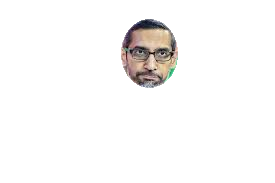

In [ ]:
image_path = '/content/sundar2.jpg'  # Replace with your image path
output_path = '/content/output_headshot3.jpg'  # Replace with desired output path
isolate_headshot(image_path, output_path)